In [1]:
from dataset import load_data, load_data_blurred
from models import EfficientNetModel
from helper_functions import train

In [2]:
# Loading data
train_loader, validation_loader = load_data_blurred()

Number of train examples: 17950
Number of evaluation examples: 4460
Done loading data...


In [3]:
# creating a model
model = EfficientNetModel(num_classes=5)

Device used: cuda
Epoch 1/10 done in 45.73 seconds ; Train Loss: 0.3177
Validation Loss: 0.0438, Validation Accuracy: 0.9800
---
Epoch 2/10 done in 41.38 seconds ; Train Loss: 0.1889
Validation Loss: 0.0245, Validation Accuracy: 0.9900
---
Epoch 3/10 done in 41.68 seconds ; Train Loss: 0.1402
Validation Loss: 0.0211, Validation Accuracy: 0.9900
---
Epoch 4/10 done in 35.13 seconds ; Train Loss: 0.1178
Validation Loss: 0.0297, Validation Accuracy: 1.0000
---
Epoch 5/10 done in 24.44 seconds ; Train Loss: 0.1080
Validation Loss: 0.0134, Validation Accuracy: 1.0000
---
Epoch 6/10 done in 24.69 seconds ; Train Loss: 0.0913
Validation Loss: 0.0058, Validation Accuracy: 1.0000
---
Epoch 7/10 done in 24.55 seconds ; Train Loss: 0.0810
Validation Loss: 0.0538, Validation Accuracy: 0.9800
---
Epoch 8/10 done in 24.62 seconds ; Train Loss: 0.0796
Validation Loss: 0.0756, Validation Accuracy: 1.0000
---
Epoch 9/10 done in 20.59 seconds ; Train Loss: 0.0737
Validation Loss: 0.0006, Validation Accu

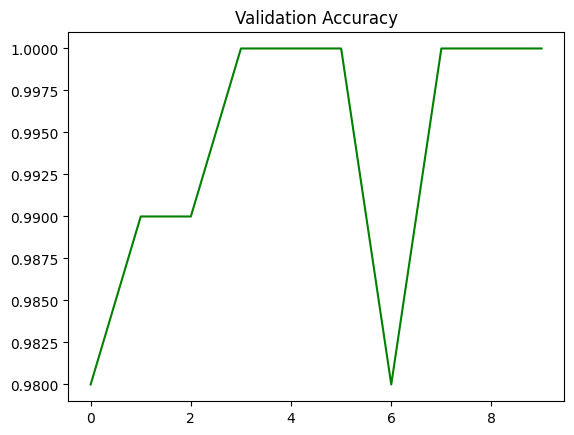

In [4]:
# training the model
trained_model = train(model.model, train_loader, validation_loader, output_path='../output/self_supervised_pretext1/gaussian_blurring/')

In [5]:
model.model = trained_model

In [6]:
# drop gaussian kernel classifier from the model and add original classifier to end of feature extraction part.
model.replace_classifier(num_classes=15)
model.set_trainable(freeze_feature_extraction=True)

In [7]:
# Loading data
train_loader, validation_loader = load_data()

Number of train examples: 3590
Number of evaluation examples: 892
Done loading data...


Device used: cuda
Epoch 1/10 done in 9.54 seconds ; Train Loss: 2.1472
Validation Loss: 1.8970, Validation Accuracy: 0.3700
---
Epoch 2/10 done in 8.70 seconds ; Train Loss: 2.0473
Validation Loss: 1.9069, Validation Accuracy: 0.4000
---
Epoch 3/10 done in 8.68 seconds ; Train Loss: 1.9881
Validation Loss: 1.7978, Validation Accuracy: 0.3900
---
Epoch 4/10 done in 8.70 seconds ; Train Loss: 1.9516
Validation Loss: 1.8042, Validation Accuracy: 0.3900
---
Epoch 5/10 done in 8.64 seconds ; Train Loss: 1.9437
Validation Loss: 1.7927, Validation Accuracy: 0.4100
---
Epoch 6/10 done in 8.67 seconds ; Train Loss: 1.9251
Validation Loss: 1.7130, Validation Accuracy: 0.4500
---
Epoch 7/10 done in 8.77 seconds ; Train Loss: 1.9060
Validation Loss: 1.7112, Validation Accuracy: 0.4600
---
Epoch 8/10 done in 8.55 seconds ; Train Loss: 1.8943
Validation Loss: 1.7957, Validation Accuracy: 0.4300
---
Epoch 9/10 done in 8.59 seconds ; Train Loss: 1.8771
Validation Loss: 1.6749, Validation Accuracy: 0.4

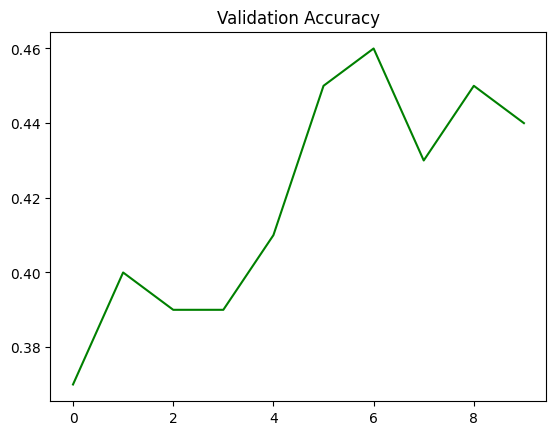

In [8]:
# training the model
trained_model_original_classifier = train(model.model, train_loader, validation_loader, output_path='../output/self_supervised_pretext1/scene_classification/')